In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df=pd.read_csv("Big Data Mart Sales.csv")

#importing the csv file

In [92]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [93]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

There are two catagaries in "Item_Fat_Content", but here we can see that there are 5 unique values. 
This is because they are not correctly spelled.
We need to replace "LF", "low fat" to "Low Fat
" and "reg" to "Regular"

In [94]:
df['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
df['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [95]:
df['Item_Fat_Content'].unique()
# after replacing

array(['Low Fat', 'Regular'], dtype=object)

In [96]:
#checking null 
print(df.isnull().mean())
df.isnull().sum()

Item_Identifier              0.000000
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

we can see that there are null values or missing values in "Item_Weight" and "Outlet_Size". We need to replace them with mean of columns in "Item_Weight" and mode of columns in "Outlet_Size"

In [97]:
#Replacing missing values of weight of Item According to means of Item Identifier
df['Item_Weight']=df['Item_Weight'].fillna(df.groupby('Item_Identifier')['Item_Weight'].transform('mean'))

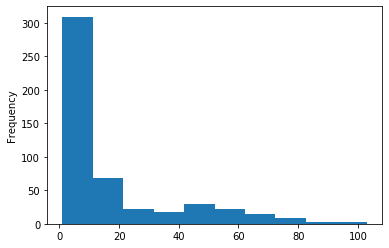

In [98]:
df['Item_Weight'].value_counts(sort=True).plot(kind="hist")

In [99]:
df['Outlet_Size'].isna().sum()

2410

In [100]:
# checking mode of "Outlet_Size"
df['Outlet_Size'].mode() 


0    Medium
dtype: object

In [101]:
df['Outlet_Size'].fillna("Medium",inplace = True)

In [102]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [103]:
df[df.Item_Weight.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [104]:

df['Item_Weight']=df['Item_Weight'].fillna(df.groupby('Item_Type')['Item_Weight'].transform('mean'))

In [105]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

As we can see there are no null values and we can proceed further

In [106]:
df['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64

"Item_Visibility" cannot be '0'. so replacing with nan 

In [107]:
df.Item_Visibility.replace(to_replace=0.000000,value=np.NaN,inplace=True)

Now we replace NaN with mean of Item_Visibility based on Item_Identifiers

In [108]:
df.Item_Visibility = df.Item_Visibility.fillna(df.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))

In [109]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Handling Catagorical variables

# Label Encoding

In [110]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
df=df.apply(LE.fit_transform)

In [111]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,322,0,695,4,5592,9,4,1,0,1,2540
1,8,59,1,921,14,473,3,8,1,2,2,422
2,662,450,0,750,10,2901,9,4,1,0,1,1639
3,1121,472,1,1264,6,4227,0,3,1,2,0,670
4,1297,302,0,710,9,627,1,1,0,2,1,865


From above correlation we can see that "Item_MRP" and "Outlet_Type" have higher correlation when compared
to the rest of the variables. 

In [112]:
df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.033716,-0.114660,-0.036246,-0.017973,0.014329,-0.008602,-0.014288,0.001389,0.003656,-0.001178,0.005916
Item_Weight,0.033716,1.000000,-0.028660,-0.028683,0.041722,0.022992,-0.007688,-0.006793,-0.006362,0.000878,-0.004639,0.008585
Item_Fat_Content,-0.114660,-0.028660,1.000000,0.060928,-0.139434,0.006624,0.000764,0.002447,-0.000622,-0.001598,0.002199,0.019345
Item_Visibility,-0.036246,-0.028683,0.060928,1.000000,-0.051873,0.000398,-0.070908,-0.055370,0.049162,-0.019372,-0.122326,-0.108999
Item_Type,-0.017973,0.041722,-0.139434,-0.051873,1.000000,0.038449,0.001656,0.006527,-0.001859,0.003084,0.003053,0.020094
Item_MRP,0.014329,0.022992,0.006624,0.000398,0.038449,1.000000,0.003005,0.003730,0.006802,0.000828,-0.001828,0.573191
Outlet_Identifier,-0.008602,-0.007688,0.000764,-0.070908,0.001656,0.003005,1.000000,-0.030969,0.504603,-0.716176,0.099873,0.200320
Outlet_Establishment_Year,-0.014288,-0.006793,0.002447,-0.055370,0.006527,0.003730,-0.030969,1.000000,0.070786,0.042005,-0.040040,0.024477
Outlet_Size,0.001389,-0.006362,-0.000622,0.049162,-0.001859,0.006802,0.504603,0.070786,1.000000,-0.614311,-0.201483,-0.099278
Outlet_Location_Type,0.003656,0.000878,-0.001598,-0.019372,0.003084,0.000828,-0.716176,0.042005,-0.614311,1.000000,0.467219,0.074671


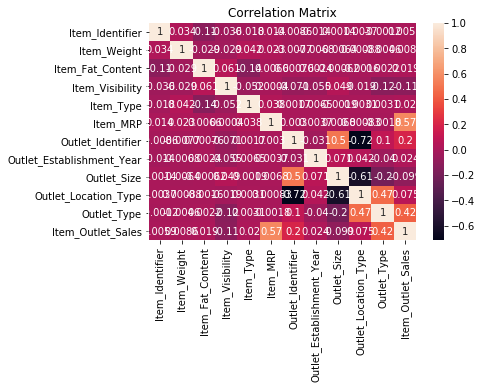

In [113]:
#checking Correaltion
corr_mat=df.corr()
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()


In [114]:
corr_mat["Item_Outlet_Sales"].sort_values(ascending=False) 
#identifying with target varible

Item_Outlet_Sales            1.000000
Item_MRP                     0.573191
Outlet_Type                  0.423720
Outlet_Identifier            0.200320
Outlet_Location_Type         0.074671
Outlet_Establishment_Year    0.024477
Item_Type                    0.020094
Item_Fat_Content             0.019345
Item_Weight                  0.008585
Item_Identifier              0.005916
Outlet_Size                 -0.099278
Item_Visibility             -0.108999
Name: Item_Outlet_Sales, dtype: float64

from above correlation, we can see that "Item_MRP" and "Outlet_Type" variables have higher correlation when compared to rest
of the variables

In [115]:
 #Assigning independent variables to 'x_input' and tager varible to 'y_output'
x_input=df.drop("Item_Outlet_Sales",axis=1)
y_output=df["Item_Outlet_Sales"]


In [116]:
x_input=x_input.drop("Outlet_Establishment_Year",axis=1)


In [117]:
x_input

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,322,0,695,4,5592,9,1,0,1
1,8,59,1,921,14,473,3,1,2,2
2,662,450,0,750,10,2901,9,1,0,1
3,1121,472,1,1264,6,4227,0,1,2,0
4,1297,302,0,710,9,627,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...
8518,370,138,0,4114,13,4955,1,0,2,1
8519,897,267,1,3442,0,2023,7,1,1,1
8520,1357,340,0,2419,8,1263,6,2,1,1
8521,681,166,1,7565,13,1857,3,1,2,2


In [118]:
x_input.skew()

Item_Identifier        -0.008877
Item_Weight            -1.060013
Item_Fat_Content        0.616705
Item_Visibility        -0.010711
Item_Type               0.101655
Item_MRP                0.000902
Outlet_Identifier      -0.059861
Outlet_Size            -0.087072
Outlet_Location_Type   -0.209093
Outlet_Type             0.927438
dtype: float64

In [119]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_input)
x_inputn=scaler.transform(x_input)
x_inputn
x_inputn=pd.DataFrame(x_inputn,columns=x_input.columns)

# splitting the data into training data and testing data

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x_inputn, y_output, test_size=0.33, random_state=42)

In [122]:
x_train.shape

(5710, 10)

In [123]:
y_train.shape

(5710,)

In [124]:
x_test.shape

(2813, 10)

In [125]:
y_test.shape

(2813,)

In [126]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)
train_predections = lm.predict(x_train)
predictions = lm.predict(x_test)

In [127]:
from sklearn.metrics import r2_score,mean_squared_error
print("Train R^2: ", r2_score(y_train, train_predections))
print("Test R^2: ", r2_score(y_test, predictions))

Train R^2:  0.5506544519642029
Test R^2:  0.5549041349773376


In [128]:
print("RMSE :", np.sqrt(mean_squared_error(y_train, train_predections)))
print("RMSE :", np.sqrt(mean_squared_error(y_test, predictions)))

RMSE : 616.7062504427719
RMSE : 609.5194745719409


In [129]:
import joblib
joblib.dump(lm,'BigDataMartSales.obj') #save the model as object file


['BigDataMartSales.obj']

# Importing the test data 

In [130]:
testdata=pd.read_csv('test.csv')

In [131]:
testdata.isnull().sum()#checking for null values

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [132]:
testdata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [133]:
testdata['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [134]:
#Replacing missing values of weight of Item According to means of Item Identifier
testdata['Item_Weight']=testdata['Item_Weight'].fillna(testdata.groupby('Item_Identifier')['Item_Weight'].transform('mean'))

In [135]:
testdata.isnull().sum()#checking for null values

Item_Identifier                 0
Item_Weight                    20
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [136]:
testdata['Item_Weight']=testdata['Item_Weight'].fillna(testdata.groupby('Item_Type')['Item_Weight'].transform('mean'))

In [137]:
testdata.isnull().sum()#checking for null values

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [138]:
# checking mode of "Outlet_Size"
testdata['Outlet_Size'].mode() 

0    Medium
dtype: object

In [139]:
testdata['Outlet_Size'].fillna("Medium",inplace = True)

In [140]:
testdata.isnull().sum()#checking for null values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [141]:
testdata['Item_Visibility'].value_counts()

0.000000    353
0.107493      2
0.159518      2
0.026711      2
0.056306      2
           ... 
0.053802      1
0.101626      1
0.091380      1
0.060802      1
0.050289      1
Name: Item_Visibility, Length: 5277, dtype: int64

In [142]:
testdata.Item_Visibility.replace(to_replace=0.000000,value=np.NaN,inplace=True)

Now we replace NaN with mean of Item_Visibility based on Item_Identifiers

In [143]:
testdata.Item_Visibility = testdata.Item_Visibility.fillna(testdata.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))

In [144]:
# LE=LabelEncoder()

testdata=testdata.apply(LE.fit_transform)

In [145]:
testdata

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,451,0,68,13,1460,9,4,1,0,1
1,1067,241,1,1804,4,965,2,7,1,1,1
2,1406,375,0,4249,11,4076,0,3,1,2,0
3,809,167,0,411,13,2522,2,7,1,1,1
4,1184,363,1,4654,4,3972,5,0,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,314,1,308,13,2164,8,2,2,0,1
5677,306,190,1,5065,15,2833,3,8,1,2,2
5678,1412,308,0,3420,8,1752,7,5,1,1,1
5679,517,389,1,4591,3,3691,2,7,1,1,1


In [146]:
x_inputn.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [147]:
testdata.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)

In [148]:
test_scale= scaler.transform(testdata)
test_scale = pd.DataFrame(test_scale,columns = testdata.columns)

In [149]:
# from sklearn.linear_model import LinearRegression
# lm = LinearRegression()
# lm.fit(x_train, y_train)
test_predictions = lm.predict(test_scale)
test_predictions=pd.DataFrame(test_predictions)

In [150]:
test_predictions.to_csv("BigDataMart_Prediction.csv")